## Importing necessary libraries

In [1]:
# importing the training dependencies
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier

# importing the evalation metrics 
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import f1_score,precision_score,recall_score,plot_confusion_matrix,plot_roc_curve,classification_report

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from scipy.stats import zscore
from scipy import stats

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.express as px

import feature_engine
import webbrowser

import warnings
import joblib
warnings.filterwarnings('ignore')

### Loading the dataset 

In [2]:
df = pd.read_csv(r"C:\Users\HP\Desktop\DataScience - DT\DSData-master\loan_prediction.csv")
pd.set_option('display.max_columns',None)
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


## Exploratory Data Analysis 

In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are 614 columns and 12 features in the dataset. The only dependant variable is Loan_Status

We are able to see that Loan_ID, Gender, Married, Dependents, Education, and Self_Employed are the categorical columns. The remaining columns are either continuous or discrete. We observe a few missing values in the dataset(for a few features). We are able to confirm that Loan_ID is an identity columns and having it or not will not affect the accuracy of the model built. Hence, we can drop this column after some prelimnary analysis. Let us use a heat-map to visualize the missing values. 

<AxesSubplot:>

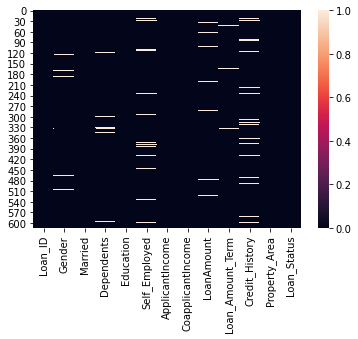

In [8]:
sns.heatmap(df.isna())

<AxesSubplot:>

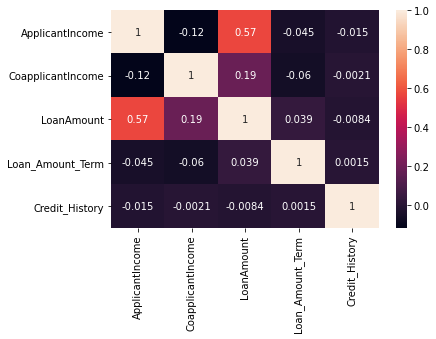

In [9]:
# plotting the correlation among the numerical columns
sns.heatmap(df.corr(),annot=True)

From the above heat-maps, we are able to confirm the missing values. 

We are also able to confirm that there is no high correlation among the numerical features.

### Univariate Analysis

Y    422
N    192
Name: Loan_Status, dtype: int64

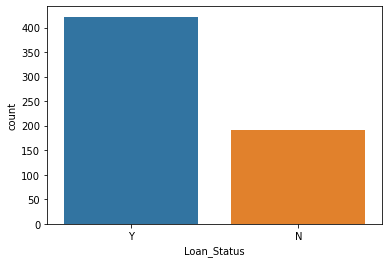

In [10]:
#Analysis on the target variable
sns.countplot(df.Loan_Status)
df['Loan_Status'].value_counts()

The dataset is slightly skewed towards the applicant receiving loans and this could impact the overall outcome of the model

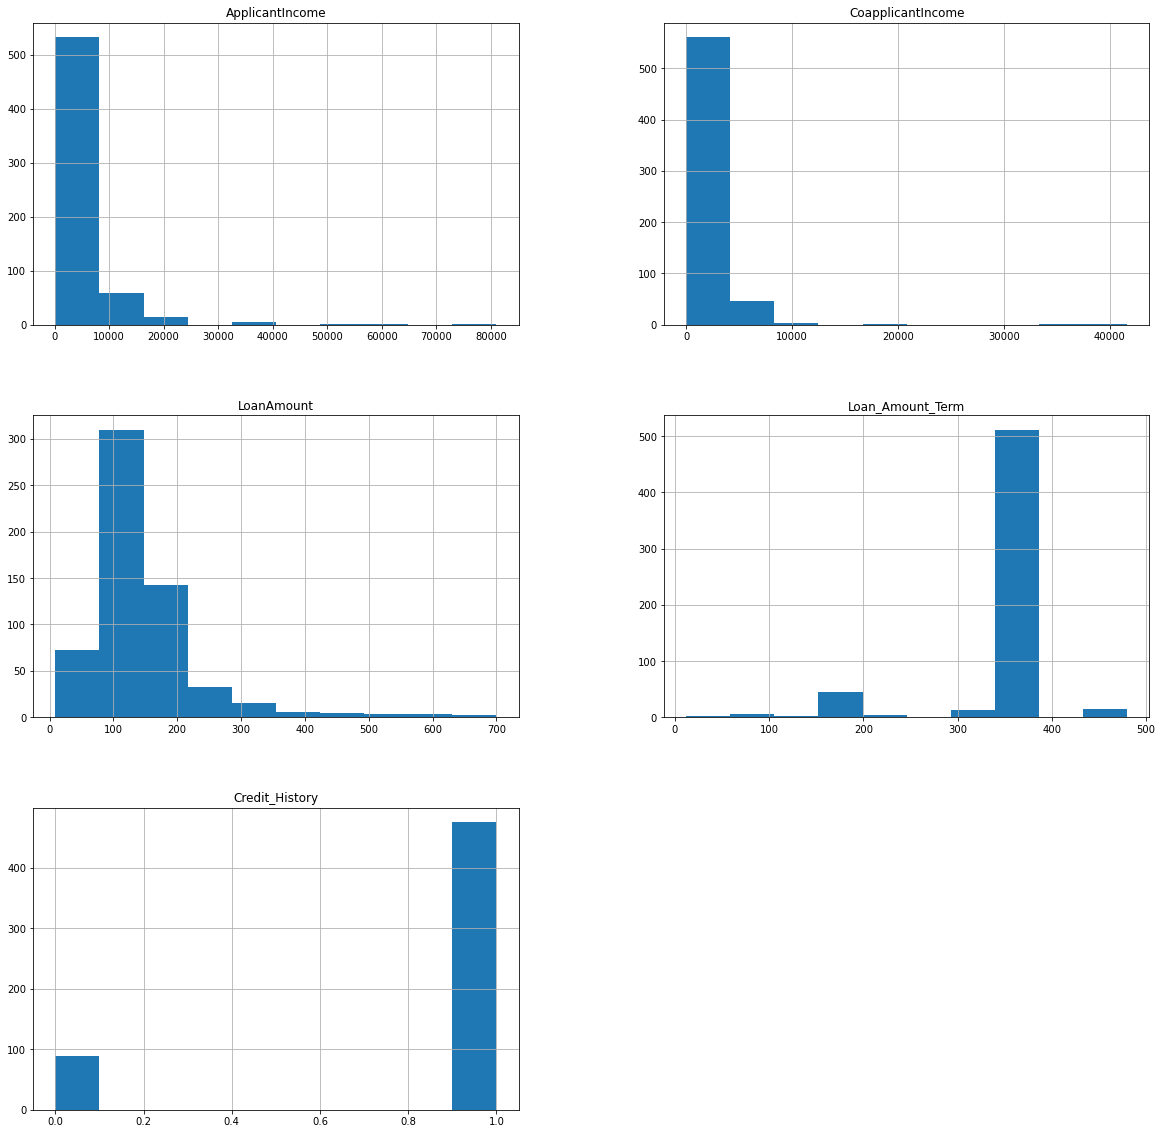

In [11]:
df.hist(figsize = (20,20))
plt.show()

From the above plots we are able to draw the following conclusions

    1. Only a little lower than 100 people have no credit history. Overall, around 85% of the total population have a credit history and the dataset is very imbalanced.
    2. The incomes of both the applicant and co-applicant is extremely very low. Lots of families earn below 15000 collectively and loans will be necessary.
    3. A majority of the loan applicants have a loan amount term of 360. A majority of the loans are between 100 and 250.

Yes    398
No     213
Name: Married, dtype: int64

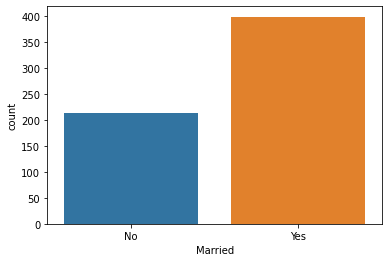

In [12]:
#Details of the Married column
sns.countplot(df.Married)
df['Married'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

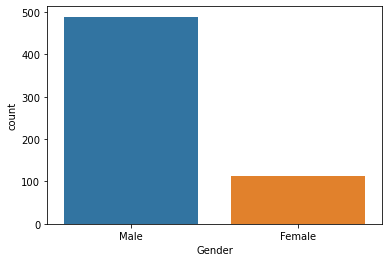

In [13]:
#Details of the Gender column
sns.countplot(df.Gender)
df['Gender'].value_counts()

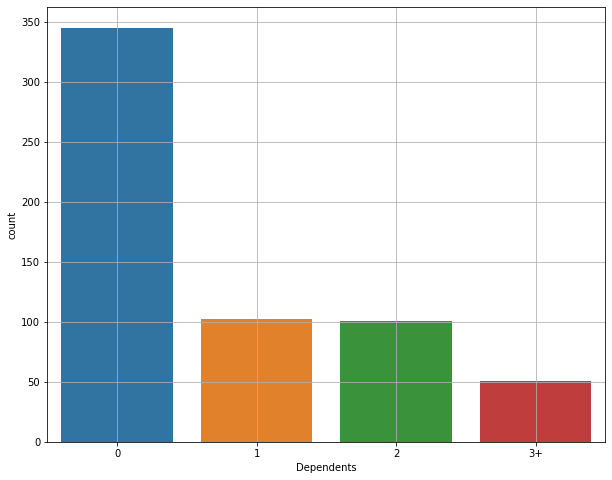

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [14]:
#Getting more information of Dependents via countplot/value counts
fig=plt.figure(figsize=(10,8))
sns.countplot(df['Dependents'])
plt.grid(True)
plt.show() 
df.Dependents.value_counts()

Some analysis looking at the above three count plots are as follows

    1. There are 4 category of the loan applicants with dependents, from 0(single) to 1(married with no kids), 2+(married with 1+ kids). There is a small percentage of this list who have 2 or more peoeple who may not be married.
    2. Looking at the numbers, it seems there is a much higher percentage of people who are male and married as well. 
    3. Around 80% of the loan applicants are male and around 65% of them are married. For a small percentage of the applicants, we don't know the gender and the number of dependents

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

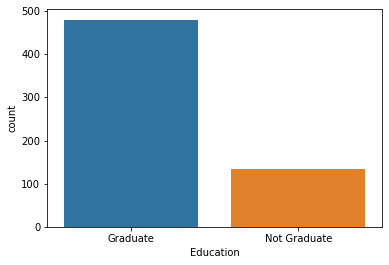

In [15]:
#Getting more information of Education via countplot/value counts
sns.countplot(df.Education)
df['Education'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

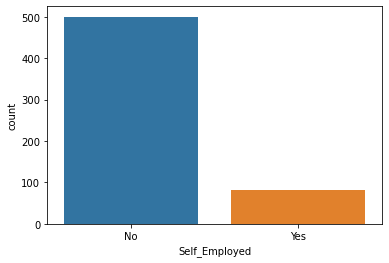

In [16]:
#Getting more information of Self_Employed via countplot/value counts
sns.countplot(df.Self_Employed)
df['Self_Employed'].value_counts()

Again a majority of the dataset are graduates who hold a job. Looking at the numbers, 500 of the people hold jobs and 480 have graduated college. A smaller portion of the dataset are self employed. We don't have information about the employement status of a few applicants

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

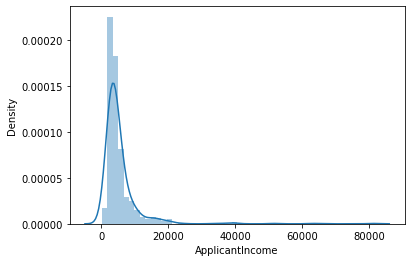

In [17]:
#Distributition plot for Applicant income
sns.distplot(df.ApplicantIncome)
df.ApplicantIncome.describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

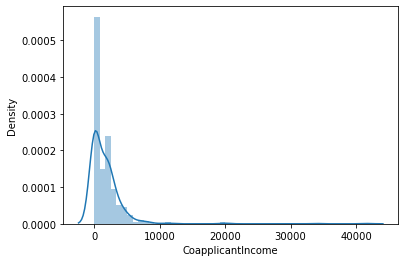

In [18]:
#Distributition plot for Coapplicant income
sns.distplot(df.CoapplicantIncome)
df.CoapplicantIncome.describe()

In [19]:
df.ApplicantIncome.value_counts()/len(df) * 100

2500    1.465798
4583    0.977199
2600    0.977199
6000    0.977199
5000    0.814332
          ...   
5818    0.162866
5819    0.162866
5821    0.162866
2750    0.162866
3691    0.162866
Name: ApplicantIncome, Length: 505, dtype: float64

In [20]:
df.CoapplicantIncome.value_counts()/len(df) * 100

0.0       44.462541
1666.0     0.814332
2083.0     0.814332
2500.0     0.814332
1750.0     0.488599
            ...    
7166.0     0.162866
2138.0     0.162866
2166.0     0.162866
3541.0     0.162866
3021.0     0.162866
Name: CoapplicantIncome, Length: 287, dtype: float64

In [21]:
#Importing necessary libraries in order to find out more information about a co-applicant
from bs4 import BeautifulSoup
import pandas as pd
import requests

page = requests.get('https://www.investopedia.com/terms/c/co-applicant.asp')
soup = BeautifulSoup(page.content)
Defn_co_applicant = []

for i in soup.find_all('p',class_ = "comp mntl-sc-block finance-sc-block-html mntl-sc-block-html"):
    
    Defn_co_applicant.append(i.text.replace('\n', ""))
    
Defn_co_applicant

['A co-applicant is an additional person considered in the underwriting and approval of a loan or other type of application. Applying for a loan with a co-applicant can help to improve the chances of loan approval and also provide for more favorable loan terms.',
 'A co-applicant may become a co-borrower once the application is approved and funded.',
 'A co-applicant is an additional applicant involved in the loan underwriting and approval process for a single loan. In some cases, a co-applicant may be considered secondary to a primary applicant.',
 'A co-applicant differs from a co-signer or guarantor in terms of their rights associated with the loan. A co-signer may be used to help a primary applicant receive more favorable loan terms. However, they are generally not given access to the funds or associated with the collateral involved. Thus, a co-signer only serves as a secondary source of payment in support of the borrower. Meanwhile, a co-applicant shares in the transaction itself.

In [22]:
df.CoapplicantIncome.describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

<AxesSubplot:xlabel='CoapplicantIncome'>

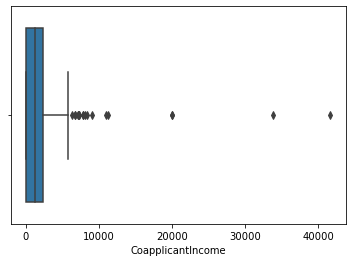

In [23]:
sns.boxplot(df.CoapplicantIncome)

Looking at the income distributition plots for both the Applicant and Co-applicant, we see that atleast 44% of the total co-applicants have no income thus making it all the more difficult for the primary applicant to secure a loan from the bank.
We are able to see that the applicant and co-applicant have a few outliers beyond 20k and it will be easy to remove them from the dataset as that number is very low. 

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

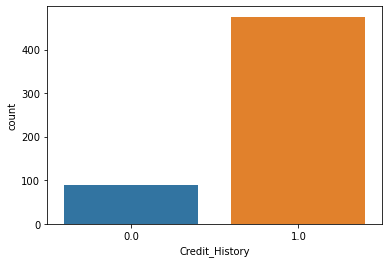

In [24]:
sns.countplot(df.Credit_History)

About 15% of the total population that are applying for a loan after definitely having a negative credit history which may/may not harm them but it sure doesn't help their case.

In [25]:
# applicants with negative credit_history when we see the
df[df.Credit_History == 0]['Loan_Status'].value_counts()/len(df) * 100

N    13.355049
Y     1.140065
Name: Loan_Status, dtype: float64

Of the 15% who actually have a negative credit history, atleast 90% don't end up getting a loan. A very small percentage of population with a negative credit history are actually successful when it comes to availing a loan

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

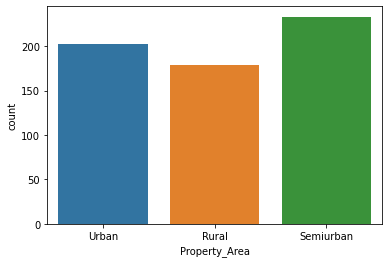

In [26]:
sns.countplot(df.Property_Area)
df.Property_Area.value_counts()

In [27]:
#Looking at the dataset who have a negative credit_history and still manage to get loans
df[((df.Credit_History == 0) & (df.Loan_Status == 'Y'))]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
122,LP001431,Female,No,0,Graduate,No,2137,8980.0,137.0,360.0,0.0,Semiurban,Y
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
201,LP001677,Male,No,2,Graduate,No,4923,0.0,166.0,360.0,0.0,Semiurban,Y
267,LP001882,Male,Yes,3+,Graduate,No,4333,1811.0,160.0,360.0,0.0,Urban,Y
326,LP002068,Male,No,0,Graduate,No,4917,0.0,130.0,360.0,0.0,Rural,Y
453,LP002449,Male,Yes,0,Graduate,No,2483,2466.0,90.0,180.0,0.0,Rural,Y
527,LP002706,Male,Yes,1,Not Graduate,No,5285,1430.0,161.0,360.0,0.0,Semiurban,Y


Most of the poeple who are getting loans despite not having a good credit history are spread accross property area

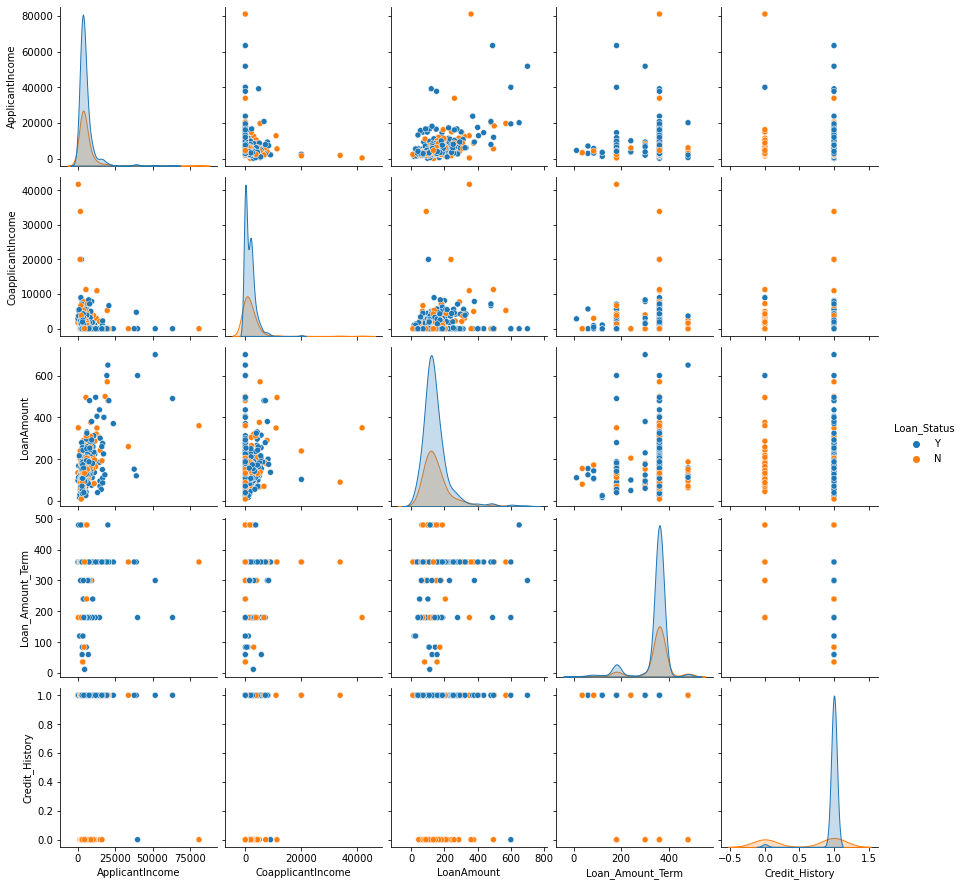

In [28]:
# pairplot of the datasets
sns.pairplot(df,hue='Loan_Status',diag_kind='kde')

### Multi-variate analysis

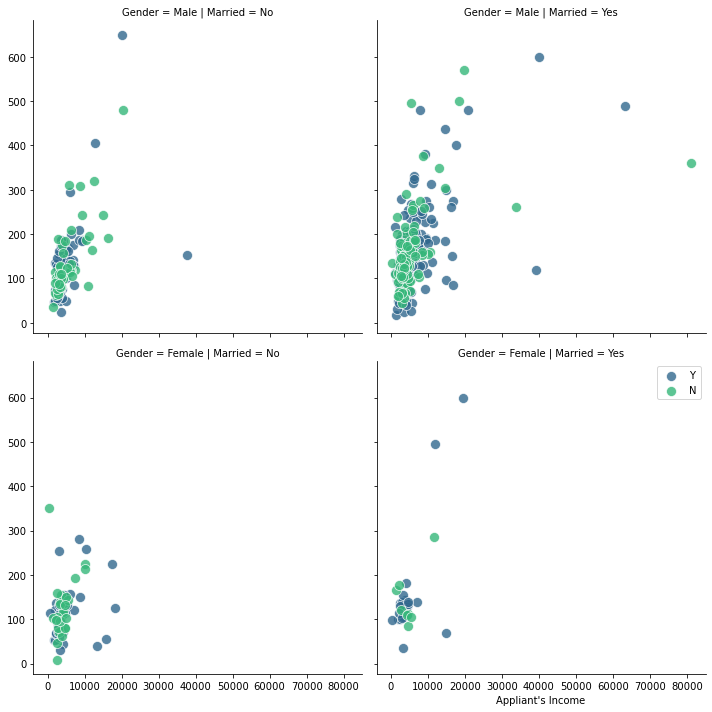

In [29]:
g = sns.FacetGrid(df, col="Married",  row="Gender", hue='Loan_Status', height=5, palette='viridis')

g.map_dataframe(sns.scatterplot, x="ApplicantIncome",y = 'LoanAmount',s=100,alpha=0.8)
plt.legend()
plt.xlabel("Appliant's Income")
plt.ylabel('Applied Loan Amount')
plt.tight_layout()

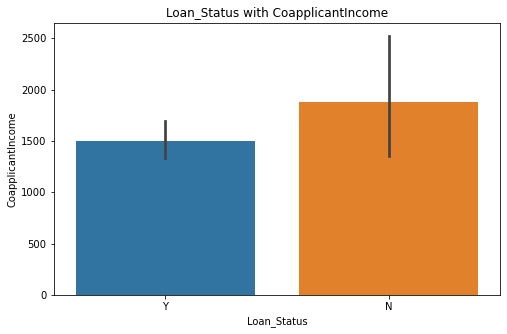

In [30]:
plt.figure(figsize=(8,5))
sns.barplot(y='CoapplicantIncome',x='Loan_Status',data=df)
plt.title("Loan_Status with CoapplicantIncome")
plt.show()

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

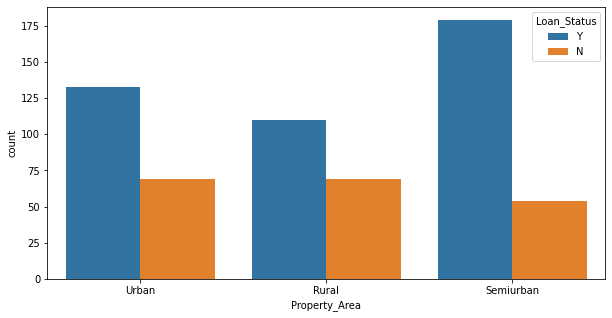

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

Looking at the three plots, we are able to draw the following conclusions

    1. In case of Urban households, there is a 55% chance of getting a loan where as the chances of getting a loan in rural area is around 67%. The highest chances of getting a loan is when you are in the semi-urban area
    2. It is surprising that the lower the co-applicant income overall, the better chances of getting a loan]
    3. There is a very high number of married male members who apply for the loan, where as the number of female applicants who have married is very low.

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

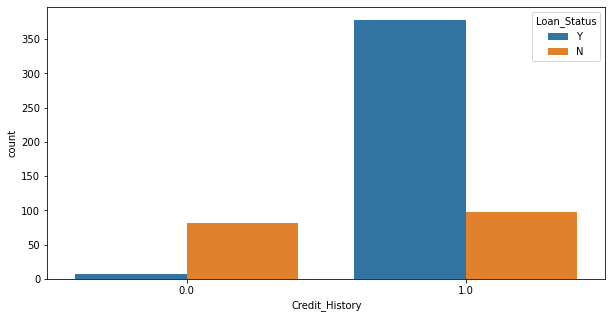

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(x='Credit_History',hue='Loan_Status',data=df)

It is almost impossible for those who a bad credit history to secure a loan. There are hardly any people who have a bad credit history and end up securing a loan. We can consider them as outliers in this dataset

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

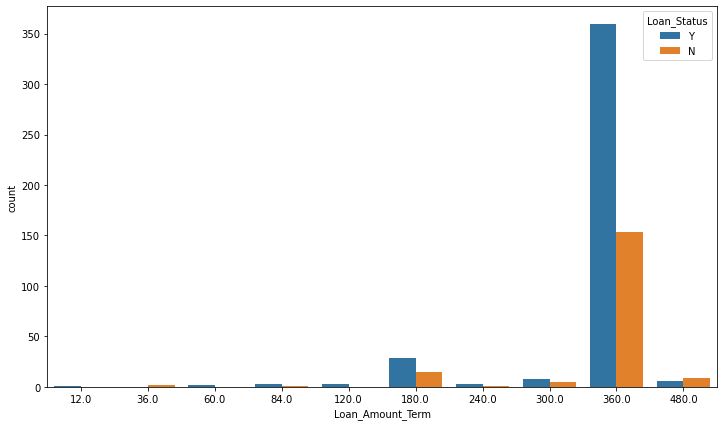

In [33]:
plt.figure(figsize=(12,7))
sns.countplot(x='Loan_Amount_Term',hue='Loan_Status',data=df)

As far as loan amount terms goes, taking a loan repayment plan of 180 days and 300 days is considered good. However, taking a loan with a 480 month loan return plan mostly results in a loan rejection

<AxesSubplot:xlabel='Education', ylabel='count'>

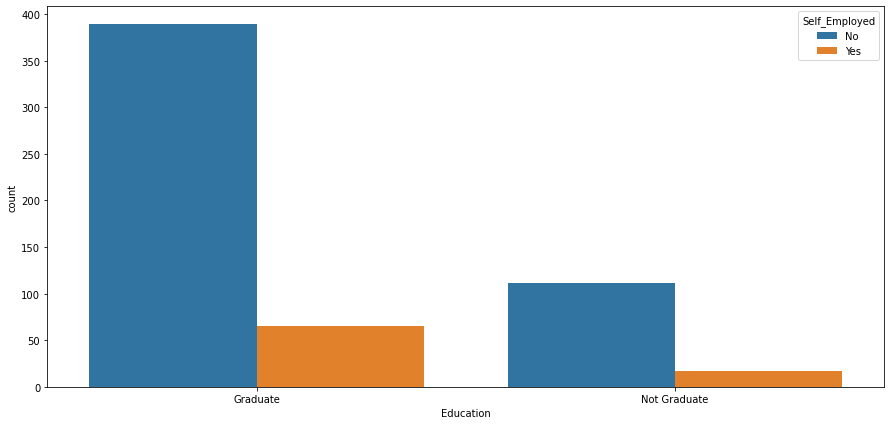

In [34]:
plt.figure(figsize=(15,7))
sns.countplot(x='Education',hue='Self_Employed',data=df)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

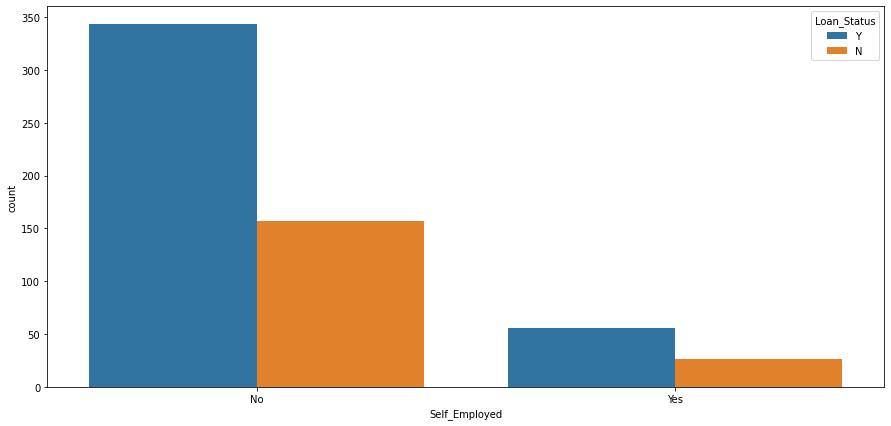

In [35]:
plt.figure(figsize=(15,7))
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

Around 12.5% of the people who graduate end up getting self employed. However, as far as non-graduates are concerned, around 15% end up employing themselves. Overall, two thirds of the people who are self employed end up getting the loan

<AxesSubplot:xlabel='Dependents', ylabel='count'>

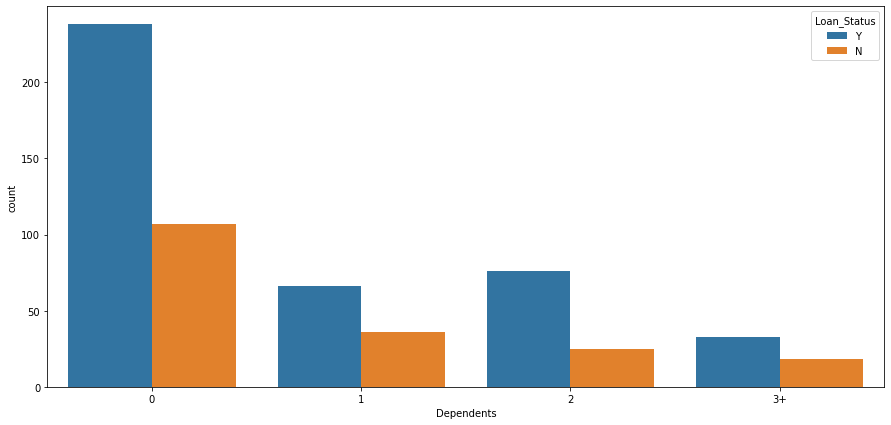

In [36]:
plt.figure(figsize=(15,7))
sns.countplot(x='Dependents',hue='Loan_Status',data=df)

Overall, people having 3 dependants have lowest chances of getting loans. This is understandable since they do not end up making ends meet as they have more mouths to feed. If is easier for people who 1 depedant to get loans when compared to people with 0 dependants.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

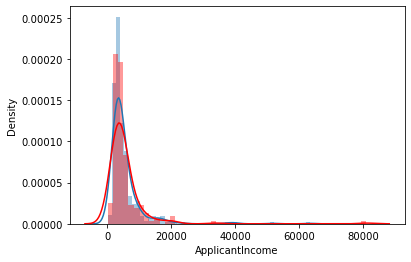

In [37]:
sns.distplot(df[df.Loan_Status == 'Y'].ApplicantIncome)
sns.distplot(df[df.Loan_Status == 'N'].ApplicantIncome,color='red')

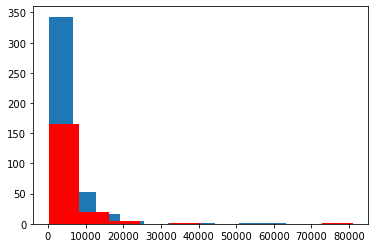

In [38]:
plt.hist(df[df.Loan_Status == 'Y'].ApplicantIncome)
plt.hist(df[df.Loan_Status == 'N'].ApplicantIncome,color='red');

In [39]:
from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()

for column in df.columns:
    df[column] = lb.fit_transform(df[column])

In [40]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df1=df[(z<3).all(axis=1)]

A total of 44(around 7%) of the 614 columns are lost after removal of outliers using the z-score technique. Upon checking the skewness in the columns, we are able to see that the dataset is far from being normally distributed.

In [41]:
df1.drop('Loan_ID', axis = 1, inplace = True)

## Machine Learning Algorithms

In [42]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,376,0,203,8,1,2,1
1,1,1,1,0,0,306,60,81,8,1,0,0
2,1,1,0,0,1,139,0,26,8,1,2,1
3,1,1,0,1,0,90,160,73,8,1,2,1
4,1,0,0,0,0,381,0,94,8,1,2,1


In [43]:
x=df1.drop(['Loan_Status'],axis=1)
y=df1['Loan_Status']

In [44]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,376,0,203,8,1,2
1,1,1,1,0,0,306,60,81,8,1,0
2,1,1,0,0,1,139,0,26,8,1,2
3,1,1,0,1,0,90,160,73,8,1,2
4,1,0,0,0,0,381,0,94,8,1,2


In [45]:
x.shape

(570, 11)

In [46]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [47]:
#Scaling using Min-max scaler
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=sc.fit_transform(x)

In [48]:
## Splitting the training anf test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = 65)

In [49]:
model = LogisticRegression()

model.fit(X_train,y_train)
pred = model.predict(X_test)
    
print('Train_Acc:', model.score(X_test,y_test))
print('Test_Acc:', model.score(X_test,y_test))
print('Recall:', recall_score(y_test,pred))
print('Precision:',recall_score(y_test,pred))
print('F1:',recall_score(y_test,pred))

Train_Acc: 0.8391608391608392
Test_Acc: 0.8391608391608392
Recall: 0.9905660377358491
Precision: 0.9905660377358491
F1: 0.9905660377358491


In [50]:
model = GaussianNB()

model.fit(X_train,y_train)
pred = model.predict(X_test)
    
print('Train_Acc:', model.score(X_test,y_test))
print('Test_Acc:', model.score(X_test,y_test))
print('Recall:', recall_score(y_test,pred))
print('Precision:',recall_score(y_test,pred))
print('F1:',recall_score(y_test,pred))

Train_Acc: 0.8321678321678322
Test_Acc: 0.8321678321678322
Recall: 0.9811320754716981
Precision: 0.9811320754716981
F1: 0.9811320754716981


In [51]:
model = KNeighborsClassifier()

model.fit(X_train,y_train)
pred = model.predict(X_test)
    
print('Train_Acc:', model.score(X_test,y_test))
print('Test_Acc:', model.score(X_test,y_test))
print('Recall:', recall_score(y_test,pred))
print('Precision:',recall_score(y_test,pred))
print('F1:',recall_score(y_test,pred))

Train_Acc: 0.7552447552447552
Test_Acc: 0.7552447552447552
Recall: 0.9245283018867925
Precision: 0.9245283018867925
F1: 0.9245283018867925


In [52]:
model = DecisionTreeClassifier()

model.fit(X_train,y_train)
pred = model.predict(X_test)
    
print('Train_Acc:', model.score(X_test,y_test))
print('Test_Acc:', model.score(X_test,y_test))
print('Recall:', recall_score(y_test,pred))
print('Precision:',recall_score(y_test,pred))
print('F1:',recall_score(y_test,pred))

Train_Acc: 0.6923076923076923
Test_Acc: 0.6923076923076923
Recall: 0.7547169811320755
Precision: 0.7547169811320755
F1: 0.7547169811320755


In [53]:
model = RandomForestClassifier(n_estimators=200)

model.fit(X_train,y_train)
pred = model.predict(X_test)
    
print('Train_Acc:', model.score(X_test,y_test))
print('Test_Acc:', model.score(X_test,y_test))
print('Recall:', recall_score(y_test,pred))
print('Precision:',recall_score(y_test,pred))
print('F1:',recall_score(y_test,pred))

Train_Acc: 0.8181818181818182
Test_Acc: 0.8181818181818182
Recall: 0.9622641509433962
Precision: 0.9622641509433962
F1: 0.9622641509433962


In [54]:
model = GradientBoostingClassifier(n_estimators=150)

model.fit(X_train,y_train)
pred = model.predict(X_test)
    
print('Train_Acc:', model.score(X_test,y_test))
print('Test_Acc:', model.score(X_test,y_test))
print('Recall:', recall_score(y_test,pred))
print('Precision:',recall_score(y_test,pred))
print('F1:',recall_score(y_test,pred))

Train_Acc: 0.8041958041958042
Test_Acc: 0.8041958041958042
Recall: 0.9433962264150944
Precision: 0.9433962264150944
F1: 0.9433962264150944


In [55]:
model = SVC(kernel='linear')

model.fit(X_train,y_train)
pred = model.predict(X_test)
    
print('Train_Acc:', model.score(X_test,y_test))
print('Test_Acc:', model.score(X_test,y_test))
print('Recall:', recall_score(y_test,pred))
print('Precision:',recall_score(y_test,pred))
print('F1:',recall_score(y_test,pred))

Train_Acc: 0.8391608391608392
Test_Acc: 0.8391608391608392
Recall: 0.9905660377358491
Precision: 0.9905660377358491
F1: 0.9905660377358491


In [56]:
# choosing the best model
models = [LogisticRegression(),GaussianNB(),KNeighborsClassifier(n_neighbors=5),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=200),GradientBoostingClassifier(n_estimators=150),SVC(kernel='linear')]
model_names = 'Logistic_regression Naive_Bayes KNN Decision_Tree Random_forest Gradient_boost SVC'.split()
models_df = pd.DataFrame(columns=['Algo','Train_acc','Test_acc','Precision','Recall','F1_score','Avg_CV'])

for (model,model_names) in zip(models,model_names):
    
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    prec = precision_score(y_test,y_preds,average='micro')
    rec = recall_score(y_test,y_preds,average='micro')
    f1 = f1_score(y_test,y_preds,average='micro')
    
    avg_cv = np.mean(cross_val_score(model,X_train,y_train))
    
    models_df = models_df.append({'Algo':model_names,'Train_acc':train_acc,'Test_acc':test_acc,'Precision':prec,'Recall':rec,'F1_score':f1,'Avg_CV':avg_cv},ignore_index=True)

In [57]:
models_df

,Algo,Train_acc,Test_acc,Precision,Recall,F1_score,Avg_CV
0,Logistic_regression,0.805621,0.839161,0.839161,0.839161,0.839161,0.803338
1,Naive_Bayes,0.807963,0.832168,0.832168,0.832168,0.832168,0.775321
2,KNN,0.798595,0.755245,0.755245,0.755245,0.755245,0.709466
3,Decision_Tree,1.000000,0.706294,0.706294,0.706294,0.706294,0.674473
4,Random_forest,1.000000,0.797203,0.797203,0.797203,0.797203,0.782216
5,Gradient_boost,0.957845,0.797203,0.797203,0.797203,0.797203,0.763529
6,SVC,0.805621,0.839161,0.839161,0.839161,0.839161,0.805691


#### Hyper parameter tuning

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
param_dict = {
    'C':[1.0,10,100,1000],
    'kernel':['rbg','linear'],
    'gamma':['scale',0.1,0.01,0.001]
}

In [60]:
gs_model = GridSearchCV(SVC(),param_grid=param_dict,verbose=2)

In [61]:
gs_model.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .....................C=1.0, gamma=scale, kernel=rbg; total time=   0.0s
[CV] END .....................C=1.0, gamma=scale, kernel=rbg; total time=   0.0s
[CV] END .....................C=1.0, gamma=scale, kernel=rbg; total time=   0.0s
[CV] END .....................C=1.0, gamma=scale, kernel=rbg; total time=   0.0s
[CV] END .....................C=1.0, gamma=scale, kernel=rbg; total time=   0.0s
[CV] END ..................C=1.0, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=1.0, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=1.0, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=1.0, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=1.0, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .......................C=1.0, gamma=0.1, kernel=rbg; total time=   0.0s
[CV] END .......................C=1.0, gamma=0.

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1.0, 10, 100, 1000],
                         'gamma': ['scale', 0.1, 0.01, 0.001],
                         'kernel': ['rbg', 'linear']},
             verbose=2)

In [62]:
gs_model.best_estimator_

SVC(kernel='linear')

In [63]:
gs_model.best_params_

{'C': 1.0, 'gamma': 'scale', 'kernel': 'linear'}

#### Saving the best model

In [64]:
best_model = SVC(kernel='linear',C = 1.0, gamma = 'scale')

In [65]:
best_model.fit(X_train,y_train)

SVC(kernel='linear')

In [66]:
pred = best_model.predict(X_test)

In [68]:
print('Train_Acc:', best_model.score(X_test,y_test))
print('Test_Acc:', best_model.score(X_test,y_test))
print('Recall:', recall_score(y_test,pred))
print('Precision:',recall_score(y_test,pred))
print('F1:',recall_score(y_test,pred))
print('Cross-Validation score:',np.mean(cross_val_score(model,X_train,y_train)))

Train_Acc: 0.8391608391608392
Test_Acc: 0.8391608391608392
Recall: 0.9905660377358491
Precision: 0.9905660377358491
F1: 0.9905660377358491
Cross-Validation score: 0.8056908344733242


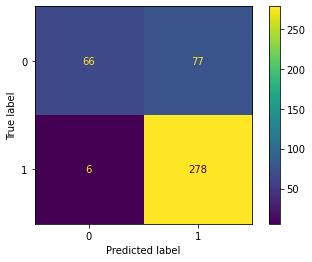

In [69]:
plot_confusion_matrix(best_model,X_train,y_train)

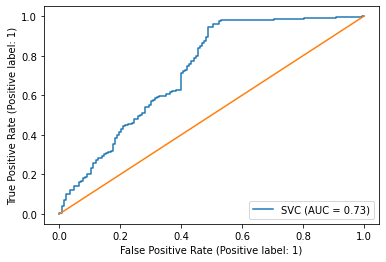

In [70]:
plot_roc_curve(best_model,X_train,y_train)
plt.plot(y_train,y_train)

In [71]:
import joblib 
joblib.dump(best_model,'loan_prediction.pkl')

['loan_prediction.pkl']